> Chap 12.2 ~ 3: Power Spectral Density and its Estimators

In [28]:
using LinearAlgebra, Plots, FFTW, Statistics, Distributions

$\star$ 정상시계열은 유한차수의 ARMA로 근사할 수 있다.

- 이를 위해 SACF 또는 SPACF 이용하여 적절한 모형의 형태를 선택하면 됨.
- 이론적 SPACF, PACF 모델 모형을 알아야 함.

$C_x = E(XX^\top)$에 ACF모든 정보가 함유되어 있고, 이 떄 $X$는 확률벡터이다.

$XX^\top = \begin{bmatrix} X_t X_t & X_t X_{t-1} & \dots \\ X_{t-1} X_t & X_{t-1} X_{t-1} & \dots \\ \dots & \dots & \dots \end{bmatrix}$

또한 이 $C_x$는 $C_x = Vdiag(p)V^{H}$로 분해 가능 $\to$ 양정치 행렬, 고유분해 가능

- $V$와 $p$가 $C_x$의 정보 함유
- $C_x$가 정상시계열 일때, 이 $V=B$ 근데 $B \to x_n = Bx_{n-1}$
- 따라서 $p$가 중요 정보 가지고 있음 $\to$ power spectral Density, PSD

Spectral analysis $C_x$에서 $p$를 특정한 뒤 $p$에서 $C_x$ 해석하는 방법론

$p = E((V^{H}X))^2$

1. $B$의 고유벡터 행렬 $V$를 구하고, $V^{H}x$ 계선
2. 계산 결과를 요소 별로 제곱하여 $p$를 구함.

$\to V^{H}_X = DFT\times X$이므로

1. $X$를 퓨리에 변환하여 $\tilde{x} = DFT X$계산
2. $\tilde{x}$를 원소별로 제곱하여 $p$를 얻는다.

- 임의의 시계열을 퓨리에변환한 뒤 제곱하면 $p$를 얻을 수 있다.

$DFT: \sin, \cos$ 주기의 조합으로 모든 시계열 설명 가능

$\star$ graph shift operator, GSO, $S = V\Lambda V^{H}$

$\tilde{x} = GFT{x} = V^Hx$

- $\tilde{x} : x$의 frequency representation

## $p$ 표현식

1. $C_x = Vdiag(p)V^H \sim diag(V^HC_xV), C_x = E(XX^H) \sim \frac{1}{R}\sum^R_{r=1} x_i x_r^H$

- $\hat{p}_{cg} = diag(V^H \hat{C}_x V) := diag[V^H[\frac{1}{R}\sum^R_{r=1} x_r x_r^H] V]$
- $\hat{p}_{cg} = diag(V^H \hat{C}_x V) = diag[V^H x_r x_r^H V]$
    - 어차피 대각선 원소에 정보가 있어서 대각 행렬로 산출되지 않았을때, 대각 행렬이 아닌 원소 버려도 영향없음

2. $p=E[(V^Hx)^2] \sim p=E[(V^Hx)^2] \sim \frac{1}{R}\sum^R_{i=1}|V^Hx_r|^2$

- $\hat{p}_{pg} = \frac{1}{R}\sum^R_{r=1} |V^H x_r |^2$
- $\hat{p}_{cg} = |V^H x_r |^2$
    - 퓨리에 변환에서 $\tilde{x} = V^H x$ 결과에 절대값 취하고 제곱한 것과 같다.

3. $C_x = \sum^N_{i=1} p_ivec(v_i,V^H_i) = G_{np}P \sim C_x = V diag(p)V^H, \hat{C}_x G_{np}p$

- 3의 $p$가 회귀에서 $\beta$ 역할, $G_{np}$ 회귀에서 설명변수 역할.
- $G_{np} V^* \otimes V$, 크로네커 곱 $\begin{pmatrix}A & C \\ B & D \end{pmatrix}\begin{pmatrix}A & B & C \\ D & E & F \\G & H & I  \end{pmatrix}\begin{pmatrix} AA & AB & AC & BA & BB & BC &\dots \\ \dots\end{pmatrix}$

In [6]:
A = [1 3
    4 5]
vec(A)

4-element Vector{Int64}:
 1
 4
 3
 5

In [9]:
B = [1 2 3
    4 5 6
    7 8 9]

3×3 Matrix{Int64}:
 1  2  3
 4  5  6
 7  8  9

In [15]:
kron(A,B) # 크로네커 곱  kronecker product

4×4 Matrix{Int64}:
  0   5   0  10
  6   7  12  14
  0  15   0  20
 18  21  24  28

In [19]:
C = [1 2 3]
D = [2 4 6
    2 5 7]

2×3 Matrix{Int64}:
 2  4  6
 2  5  7

In [20]:
hcat([kron(C[:,i],D[:,i]) for i in 1:size(C)[2]]...)

2×3 Matrix{Int64}:
 2   8  18
 2  10  21

In [21]:
columnwise_kron = 
(C,D) -> hcat([kron(C[:,i],D[:,i]) for i in 1:size(C)[2]]...) # column-wise kronecker product

#11 (generic function with 1 method)

In [22]:
columnwise_kron(C,D)

2×3 Matrix{Int64}:
 2   8  18
 2  10  21

## Property 12.1

$f_T = f_x * f_y \to M_T = M_x \bullet M_y$

마치 $f_x$를 $M_x$로 바꾸고 $f_Y$를 $M_Y$로 바꾸고 $f_T$를 $M_T$로 바꾸고 $*$연산은 $\bullet$ 연산으로 바꾸면 되는듯이 보이고, 실제로 그렇다.

$Hx = h * x \to Hx = \tilde{h} \bullet \tilde{x}$

time domain 에서 convolution 연산은 freq-domain 에서 * 연산과 같음 

예시: X의 pdf 와 Y의 pdf를 각각 f,g 라고 하자. 그리고 mgf 를 각각 F,G 라고 하자. 

time domain: X+Y의 pdf는 conv(f,g) 

freq domain: X+Y의 mgf는 F*G 

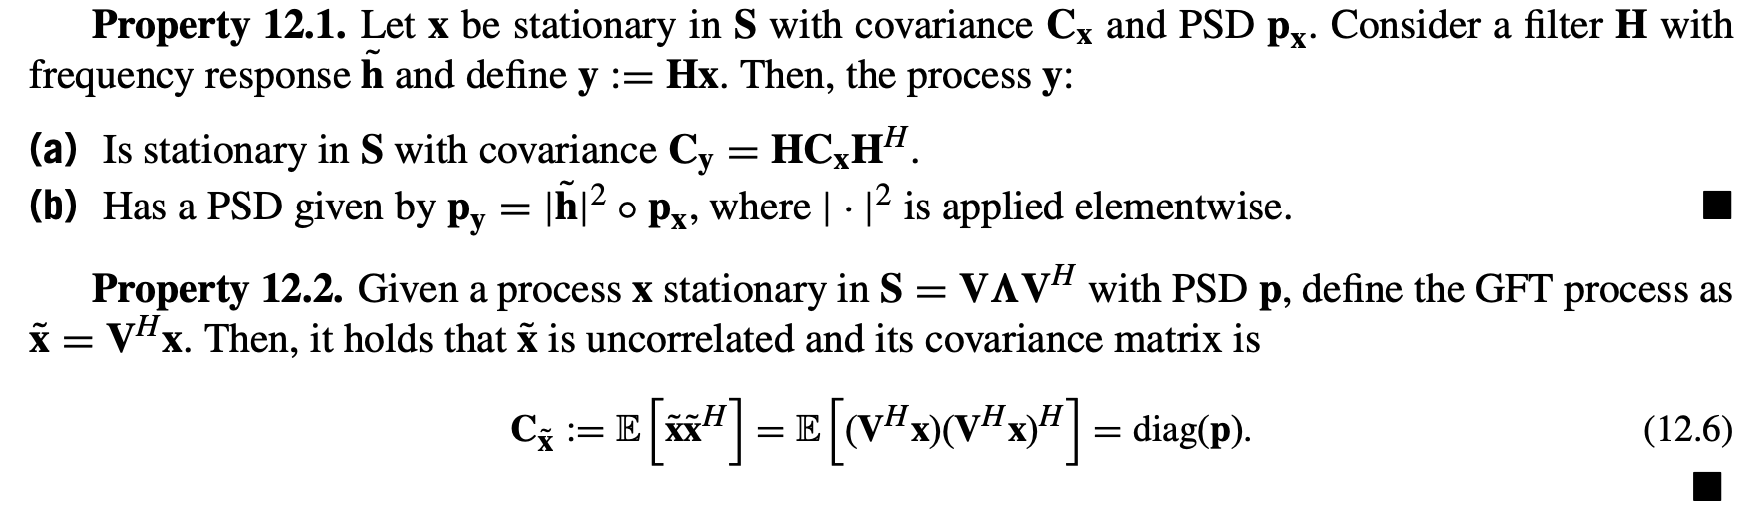

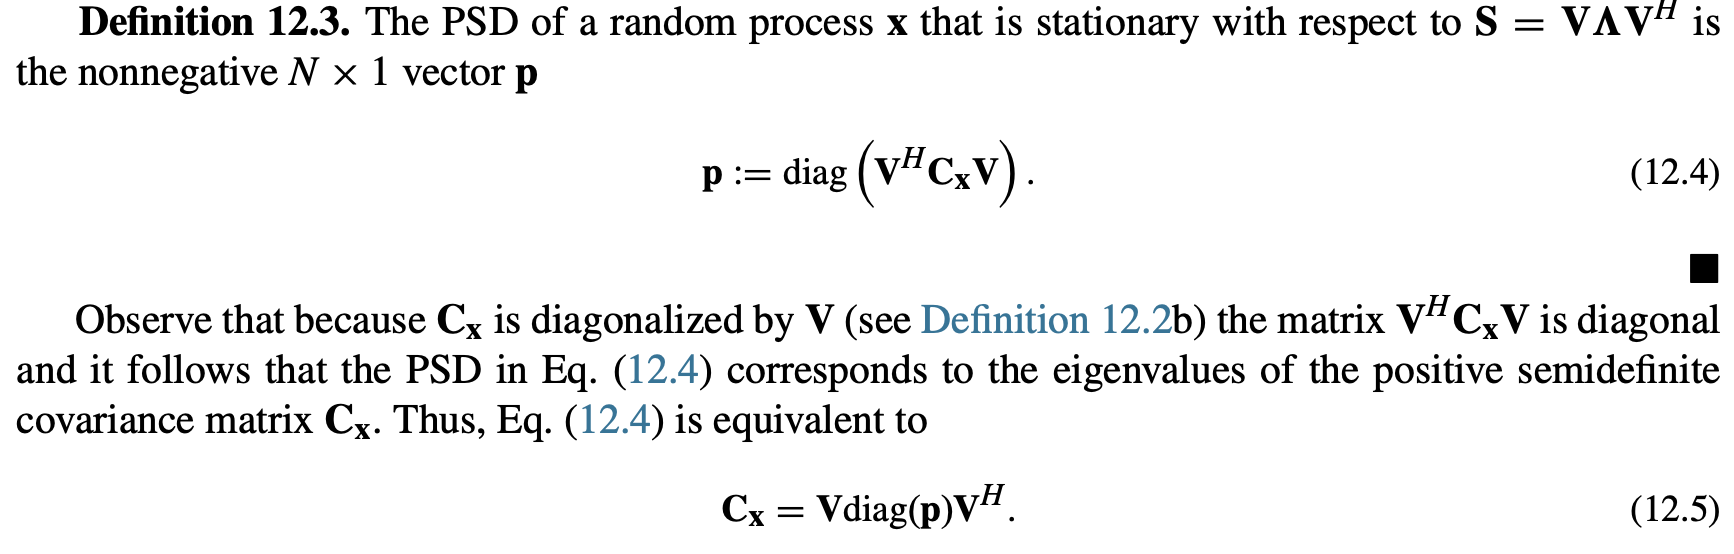

https://dlsun.github.io/probability/sums-continuous.html

### Sums of Continuous Random Variables

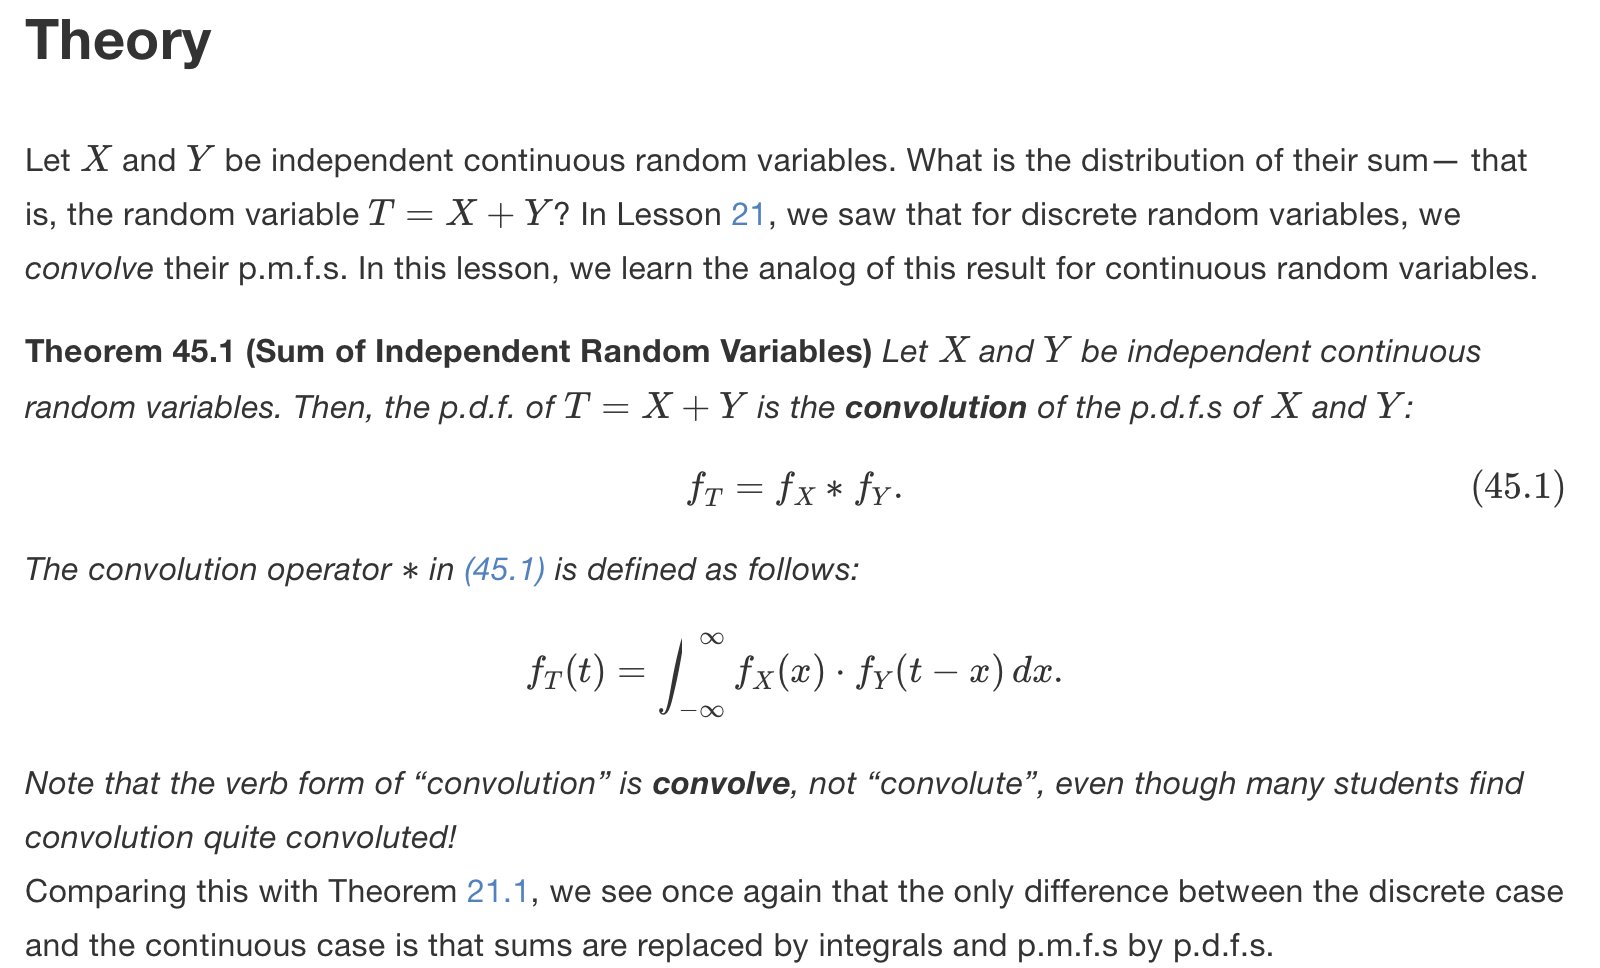

https://en.wikipedia.org/wiki/Convolution_theorem

### Convolution Theorem

In mathematics, the convolution theorem states that under suitable conditions the Fourier transform of a convolution of two functions (or signals) is the pointwise product of their Fourier transforms. More generally, convolution in one domain (e.g., time domain) equals point-wise multiplication in the other domain (e.g., frequency domain). Other versions of the convolution theorem are applicable to various Fourier-related transforms.

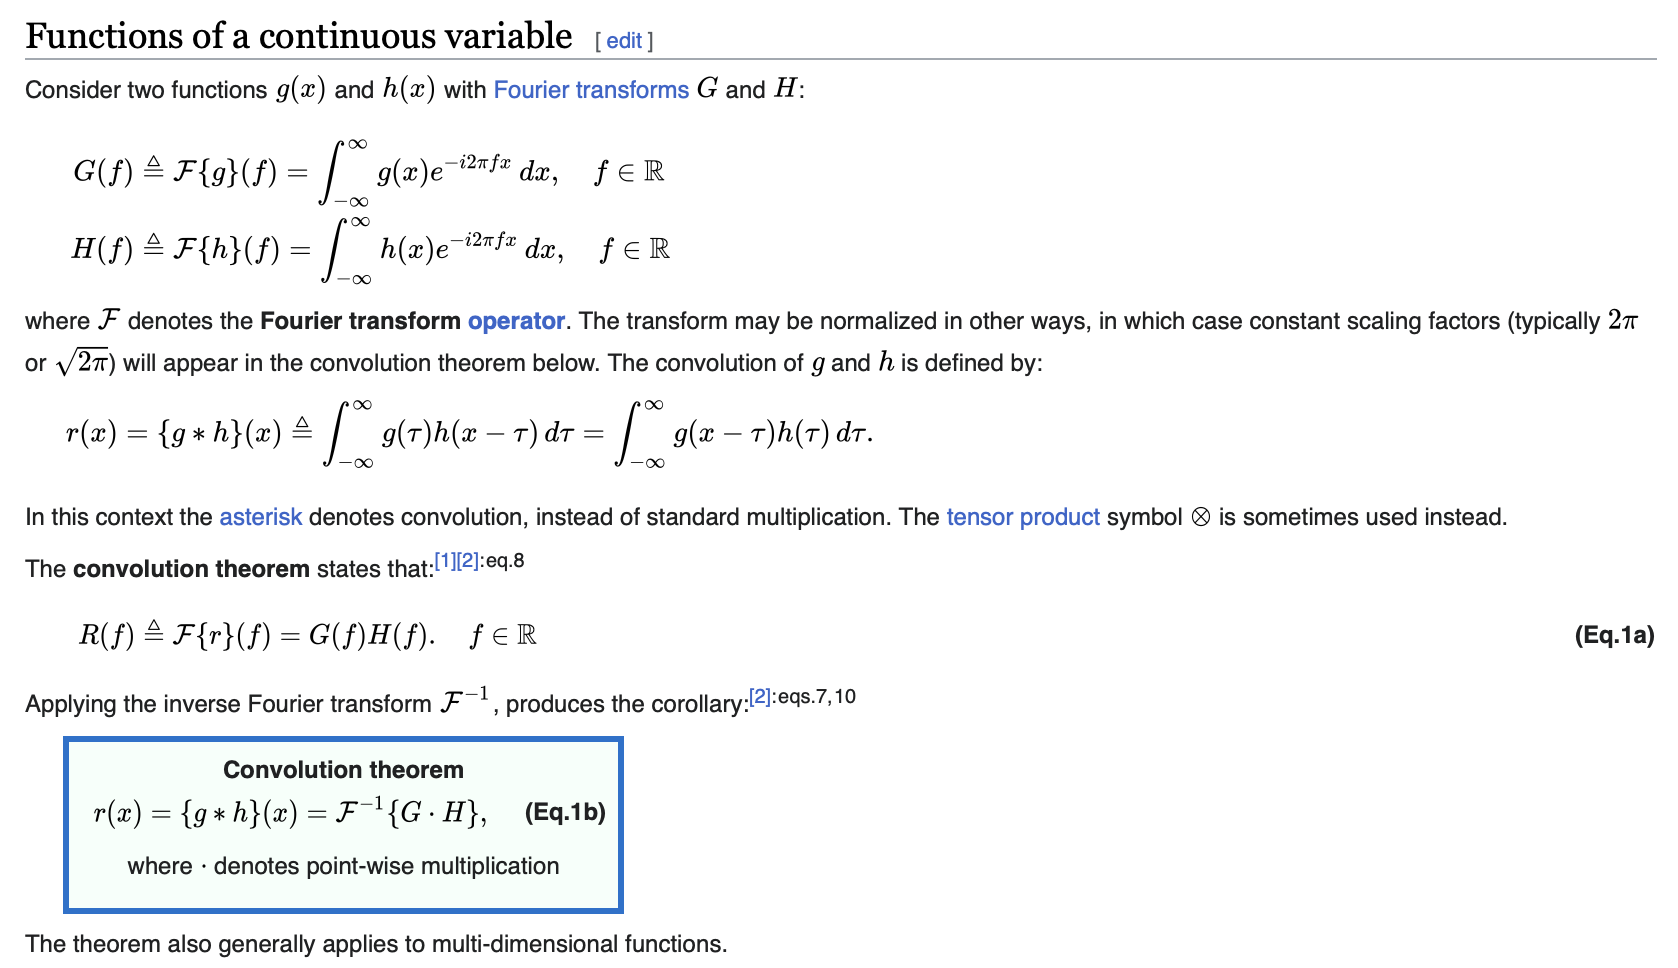

https://faculty.math.illinois.edu/~hildebr/370/370mgfproblems.pdf

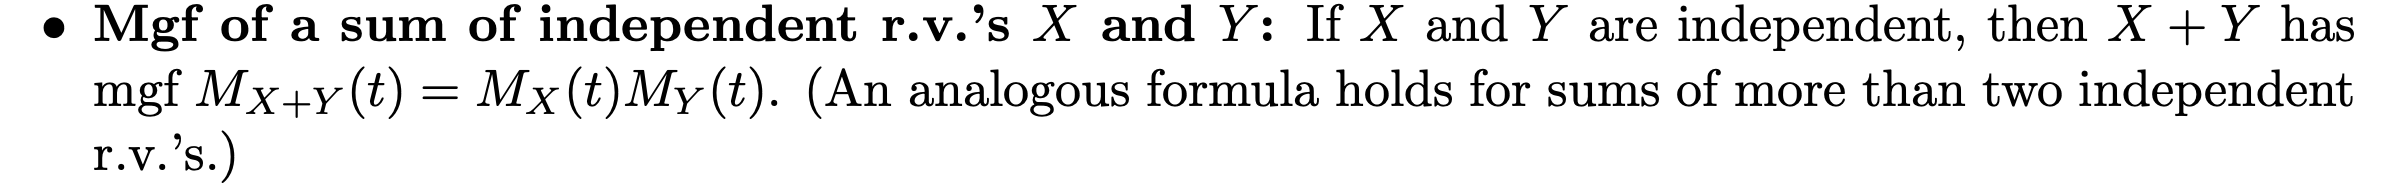

## $R$의 개념

확률변수

예) 동전 던지기를 한다고 했을때 사건, event $\to$ H 앞, T 뒤

확률벡터

예) 동전 던지기를 두 번 했을 떄, 나올 수 있는 집합,

- $HH$
- $HT$
- $TH$
- $TT$

동전을 100회 던질때, 이떄 각 사건은 독립.

$X = \{ X_1, X_2, \dots, X_{100}\}$

$E(X_{77}) = 0.5$일 것이다.

이게 정말 $0.5$인지 시뮬레이션으로 확인해본다면,

1. 100회의 평균을 제시하는 방법(R=1)
2. simulation을 N번 하여 그 중 77번째의 값을 평균내는 방법(R=N)

이 있는데, 2번의 방법은 현실적으로 불가능. 따라서 1번을 제시하는 경우가 많다.

In [69]:
let 
    N=100
    n=1
    p=0.5
    X=rand(Binomial(n,p),N)
    """
    mean: $(n*p),simulation: $(mean(X))"""
end

"mean: 0.5,simulation: 0.49"

`-` 1번의 방법

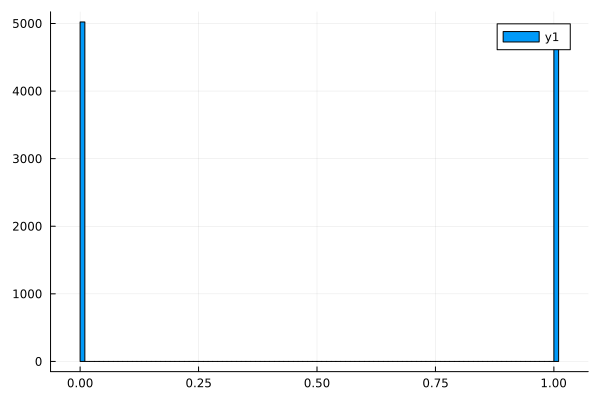

In [65]:
histogram(rand(Bernoulli(0.5),10000),bins=0:0.01:1.01)

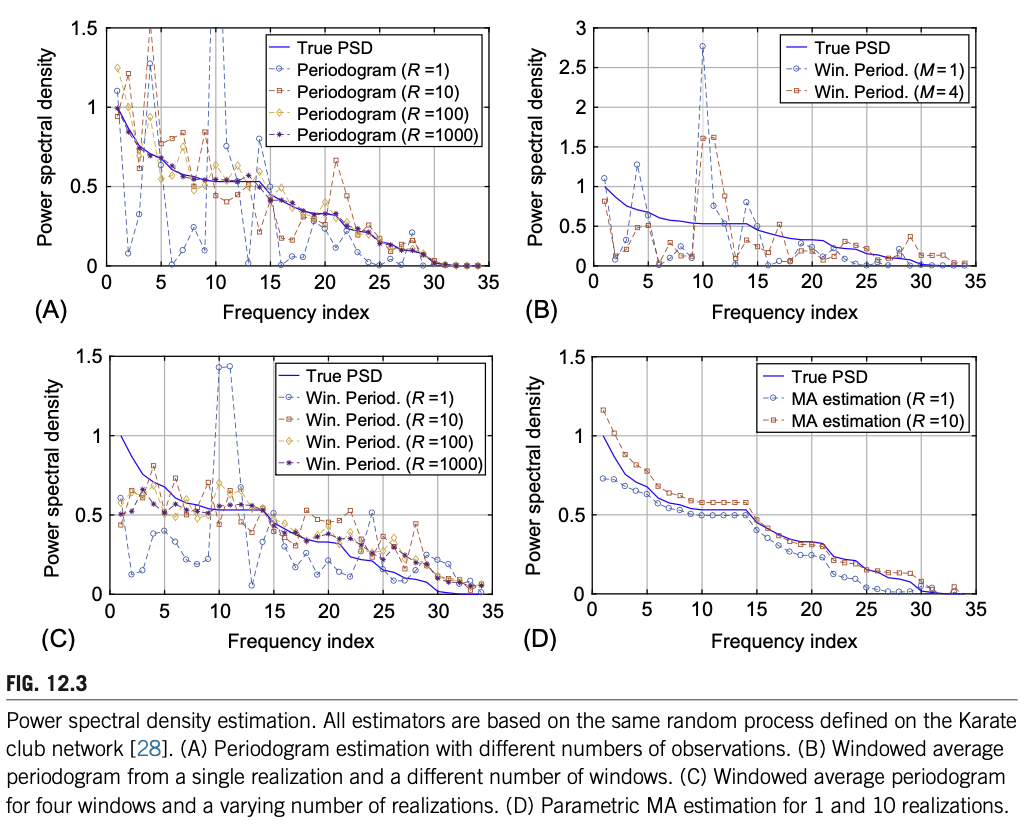

$R$ = 1

- 실제로, 한 관측치에서 시계열 하나만 갖을 수 있고, 여러개의 시계열을 가진다는 것은 비현실적이다.
- 책에서 돌린 $R=100$의 개념은 시뮬레이션으로서 가능,
    - 왼쪽 위 사진: $R=1$때 분산이 크고, $R=100$일때 TRUE값이 잘 맞음
    - 왼쪽 아래 사진: $R=1$일때 분산이 작아지고, R=100일때 TRUE값과 편차bias가 생겼다.
    - 현실적으로 $R=1$만 얻어지기 때문에 위(periodogram)보다 아래(Win. Period) 방법을 쓰는 것이 더 낫다고 저자는 제안함

$\star R=1000$ 일때도 동일하다고 말하기 위해서 `정상`의 개념이 필요하다, 정상성을 띄고 있어야 시계열을 많이 가지고 있어도 일정하다고 말할 수 있기 때문